In [1]:
import scipy as sp
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
import numpy as np
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

# Problem 1

Use the finite element method to solve
 
εy" − y' = −1,

y(0) = α, y(1) = β,


where α = 2, β = 4, and ε = 0.02. Use N = 100 finite elements (101 grid points). Compare
your solution with the analytic solution

y(x) = α + x + (β − α − 1)* (e^(x/ε) − 1)/(e^(1/ε) − 1) by graphing.


<IPython.core.display.Javascript object>


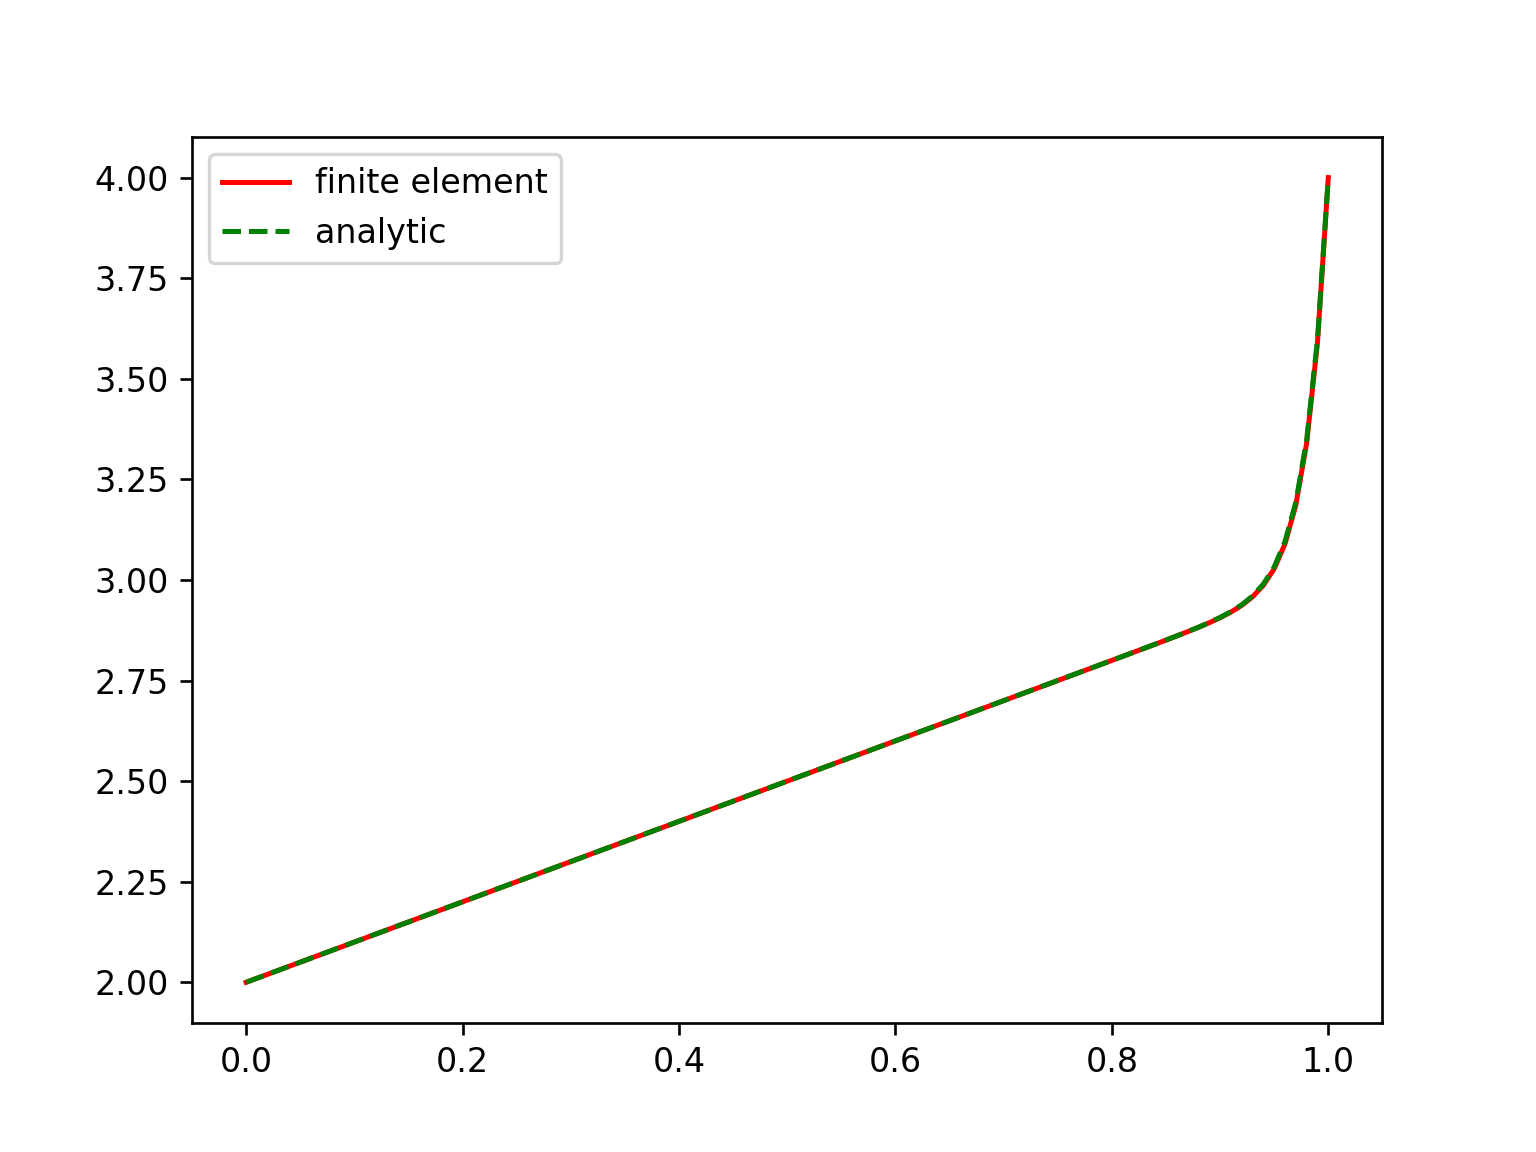

In [2]:
α = 2; β = 4 
ε = 0.02
y = lambda x: α + x + (β - α - 1)*(np.exp(x/ε) - 1)/(np.exp(1/ε) - 1)
N = 100
a,b = 0,1
xs = np.linspace(a,b,N+1)
hs = xs[1::] - xs[:-1:]

#build A
A = np.zeros((N+1,N+1))

#ε/hs[i-1] -1/2
upp_dog = np.array([ε/hs[i-1] -1/2 for i in range(1,N)])
upp_dog = np.concatenate(([0],upp_dog))

main_diag = np.array([-ε/hs[i-1] - ε/hs[i+1-1] for i in range(1,N)])
main_diag = np.concatenate(([0],main_diag,[0]))

#ε/hs[i+1-1] + 1/2
lower_diag = np.array([ε/hs[i+1-1] + 1/2 for i in range(1,N)])
lower_diag = np.concatenate((lower_diag,[0]))

A += np.diag(upp_dog,k=1)
A += np.diag(main_diag)
A += np.diag(lower_diag,k=-1)
A[0,0], A[-1,-1] = 1,1

#build and solve system
PHI = np.concatenate(([α],(-1/2)*np.array([hs[i-1]+hs[i] for i in range(1,N)]),[β]))
A = sp.sparse.csr_matrix(A)
K = spsolve(A,PHI)

plt.plot(xs,K,label="finite element",color='r')
plt.plot(xs,y(xs),label="analytic",color='g',linestyle="--")
plt.legend()
plt.show()

# Problem 2

Compare the numerical solution when the grid points are unevenly spaced versus when the grid points
are clustered in the area of greatest change by plotting.

<IPython.core.display.Javascript object>


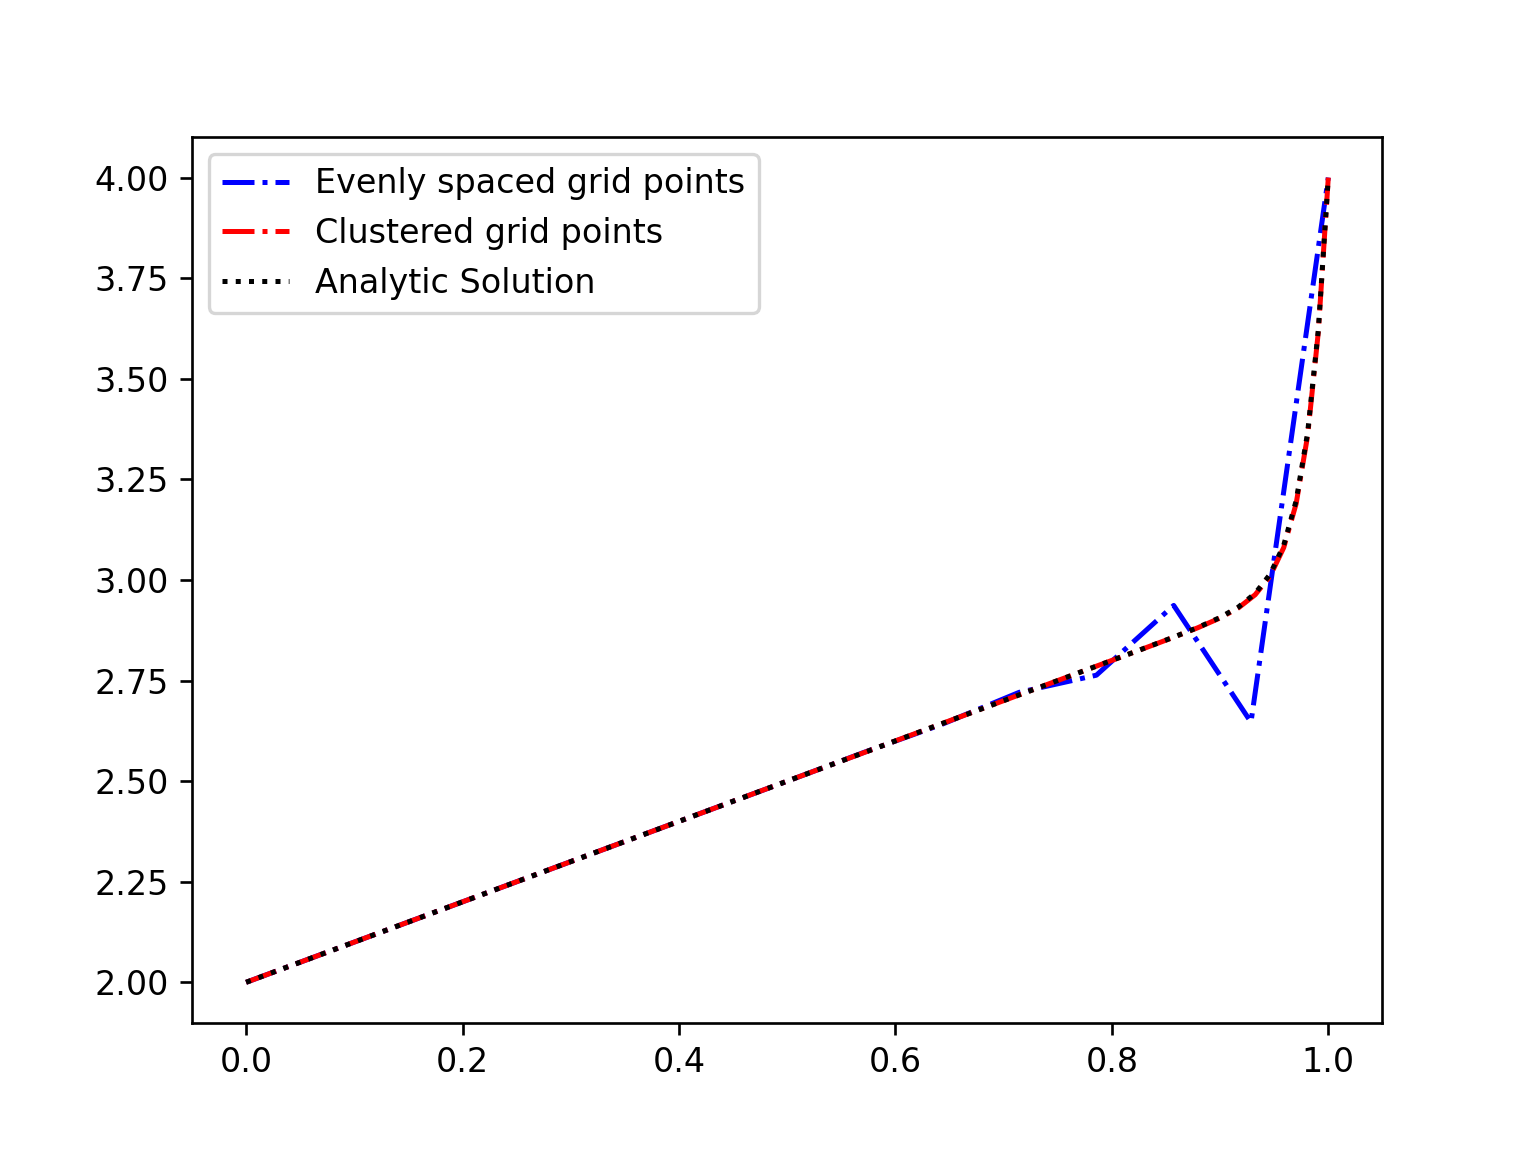

In [3]:
α = 2; β = 4 
ε = 0.02
y = lambda x: α + x + (β - α - 1)*(np.exp(x/ε) - 1)/(np.exp(1/ε) - 1)
N = 14
a,b = 0,1

even_grid = np.linspace(a,b,N+1)
clustered_grid = np.linspace(a,b,N+1)**(1./8)
grids = [even_grid,clustered_grid]
grid_labels = ["Evenly spaced grid points", "Clustered grid points"]
colors = ['b','r']

for grid,label,color in zip(grids, grid_labels,colors):
    xs = grid
    hs = xs[1::] - xs[:-1:]

    #build A
    A = sp.sparse.lil_matrix((N+1,N+1))

    #ε/hs[i-1] -1/2
    upp_dog = np.array([ε/hs[i] -1/2 for i in range(1,N)])
    upp_dog = np.concatenate(([0],upp_dog))

    main_diag = np.array([-ε/hs[i-1] - ε/hs[i] for i in range(1,N)])
    main_diag = np.concatenate(([0],main_diag,[0]))

    #ε/hs[i+1-1] + 1/2
    lower_diag = np.array([ε/hs[i-1] + 1/2 for i in range(1,N)])
    lower_diag = np.concatenate((lower_diag,[0]))

    A += np.diag(upp_dog,k=1)
    A += np.diag(main_diag)
    A += np.diag(lower_diag,k=-1)
    A[0,0], A[-1,-1] = 1,1

    #build and solve system
    PHI = np.concatenate(([α],(-1/2)*np.array([hs[i-1]+hs[i] for i in range(1,N)]),[β]))
    A = sp.sparse.csc_matrix(A)
    K = spsolve(A,PHI)

    plt.plot(xs,K,label=label,color=color,linestyle="dashdot")

plt.plot(xs,y(xs),label="Analytic Solution",color='k',linestyle=":")
    
plt.legend()
plt.show()

    

# Problem 3

Solve (11.5) with the finite element method using N = 2i finite elements, i = 4, 5, . . . , 21.
Use a log-log plot to graph the error.

In [6]:
α = 2; β = 4 
ε = 0.02
y = lambda x: α + x + (β - α - 1)*(np.exp(x/ε) - 1)/(np.exp(1/ε) - 1)
N = 14
a,b = 0,1

errs = []
Ns = [2**i for i in range(4,22)]

for N in [2**i for i in range(4,22)]:
    xs = np.linspace(a,b,N+1)
    hs = xs[1::] - xs[:-1:]

    #build A

    #ε/hs[i-1] -1/2
    upp_dog = np.array([ε/hs[i-1] -1/2 for i in range(1,N)])
    upp_dog = np.concatenate(([0],upp_dog))

    main_diag = np.array([-ε/hs[i-1] - ε/hs[i+1-1] for i in range(1,N)])
    main_diag = np.concatenate(([0],main_diag,[0]))

    #ε/hs[i+1-1] + 1/2
    lower_diag = np.array([ε/hs[i+1-1] + 1/2 for i in range(1,N)])
    lower_diag = np.concatenate((lower_diag,[0]))

    A = sp.sparse.diags([upp_dog,main_diag,lower_diag],[1,0,-1],(N+1,N+1))
    
    #build and solve system
    PHI = np.concatenate(([α],(-1/2)*np.array([hs[i-1]+hs[i] for i in range(1,N)]),[β]))
    A = sp.sparse.csr_matrix(A)
    A[0,0], A[-1,-1] = 1,1
    K = spsolve(A,PHI)
    ys = y(xs)
    err = np.linalg.norm(ys-K,ord=np.inf) #error calculations
    errs.append(err)

<IPython.core.display.Javascript object>


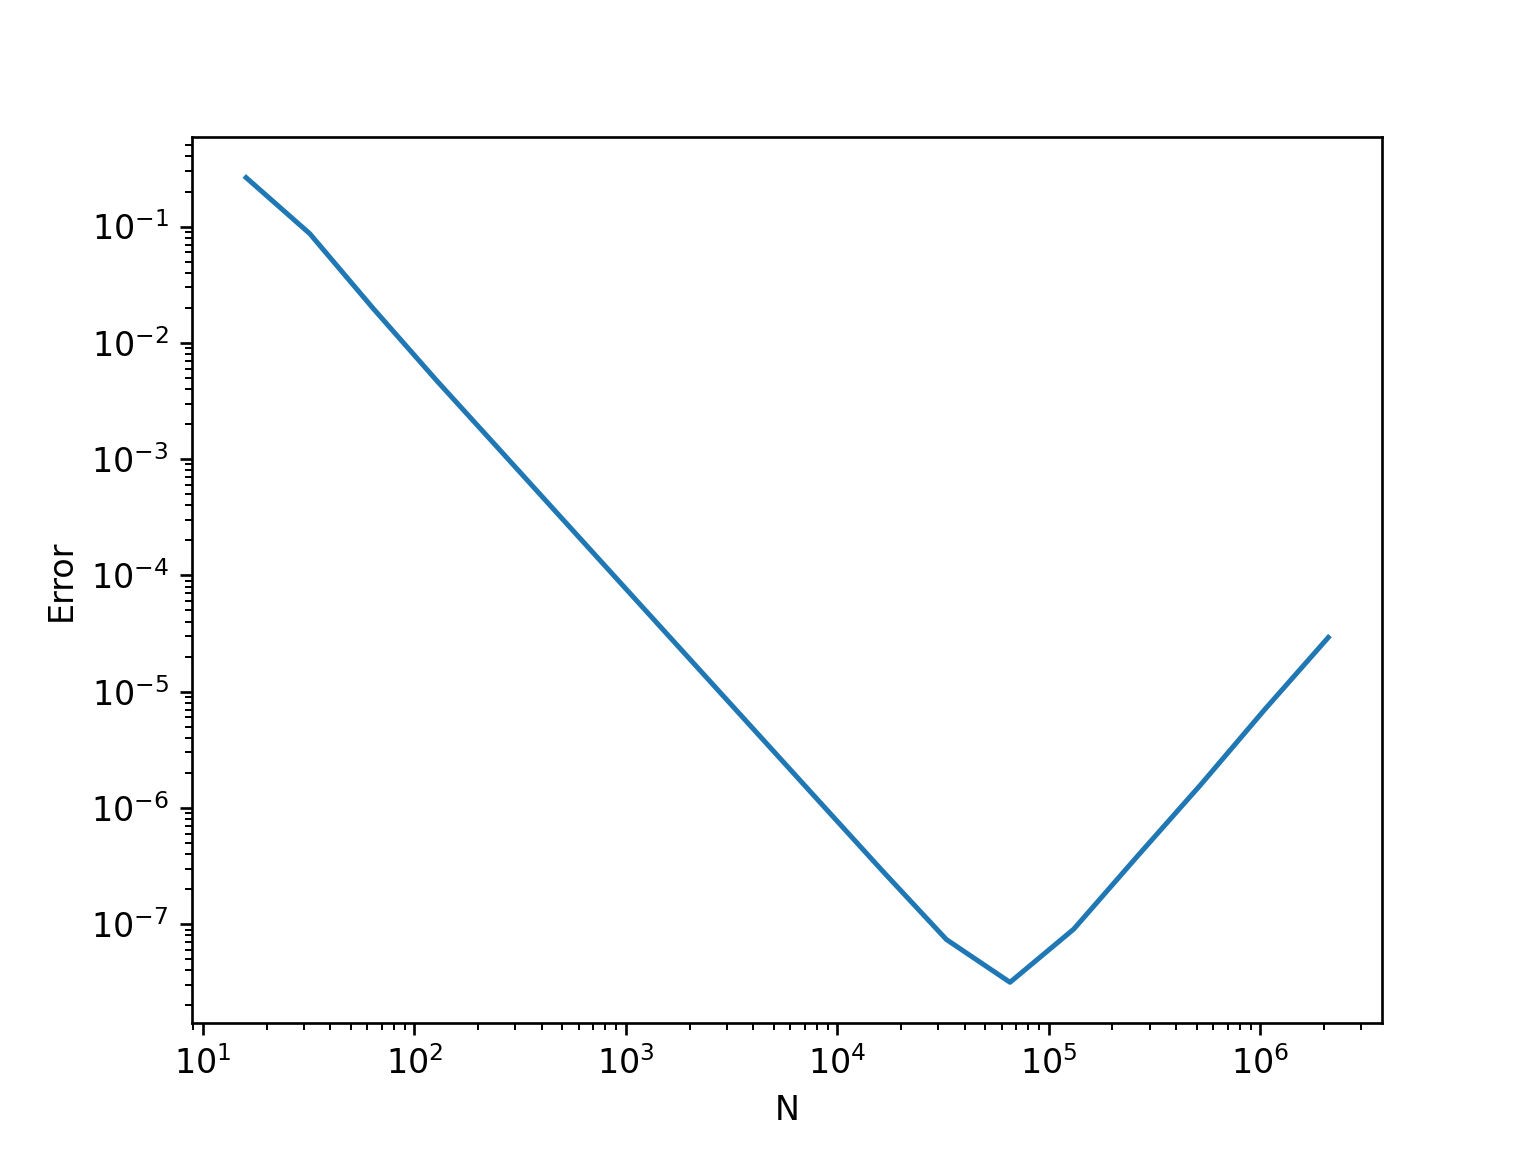

In [7]:
plt.loglog(Ns,errs)
plt.ylabel("Error")
plt.xlabel("N")
plt.show()